In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import itertools
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder


from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bankmarketing.csv',sep=';')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
data.describe(include='object').transpose()

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [ ]:
data.shape

(41188, 21)

In [ ]:
data[data.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [ ]:
data.drop_duplicates(inplace=True)
data[data.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [ ]:
data.shape

(41176, 21)

In [ ]:
q25,q75=np.percentile(data.age,(25,75))
qr=q75-q25
max=q75+qr*1.5
min=q25-qr*1.5
data.age[data.age>max]=max
data.age[data.age<min]=min
q25,q75,qr,max,min

<ipython-input-16-274cb3a5e372>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[data.age>max]=max


(32.0, 47.0, 15.0, 69.5, 9.5)

In [ ]:
data.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
li=['duration','campaign','emp.var.rate','cons.price.idx',
    'cons.conf.idx','euribor3m','nr.employed','pdays','previous'] #numericaldata

for i in li:
    q25,q75=np.percentile(data[i],(25,75))
    qr=q75-q25
    max=q75+qr*1.5
    min=q25-qr*1.5
    data[i][data[i]>max]=max
    data[i][data[i]<min]=min
    print(f'For {i} :\n',q25,q75,qr,max,min)

For duration :
 102.0 319.0 217.0 644.5 -223.5
For campaign :
 1.0 3.0 2.0 6.0 -2.0
For emp.var.rate :
 -1.8 1.4 3.2 6.200000000000001 -6.6000000000000005
For cons.price.idx :
 93.075 93.994 0.9189999999999969 95.3725 91.69650000000001
For cons.conf.idx :
 -42.7 -36.4 6.300000000000004 -26.949999999999992 -52.150000000000006
For euribor3m :
 1.344 4.961 3.617 10.3865 -4.081499999999999
For nr.employed :
 5099.1 5228.1 129.0 5421.6 4905.6
For pdays :
 999.0 999.0 0.0 999.0 999.0
For previous :
 0.0 0.0 0.0 0.0 0.0


<ipython-input-19-54618211e2f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>max]=max
<ipython-input-19-54618211e2f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>max]=max
<ipython-input-19-54618211e2f3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]<min]=min
<ipython-input-19-54618211e2f3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
key=X.keys()


In [ ]:
y.replace('no',0,inplace=True)
y.replace('yes',1,inplace=True)

In [ ]:
#trasformisanje kategorijalnih u numericke vrijednosti
label=LabelEncoder()
for i in X.select_dtypes(include='object').columns:
    X[i]=label.fit_transform(X[i])
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,69.5,5,1,5,0,2,0,0,7,0,334.0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
#skaliranje vrijednosti
min_max=MinMaxScaler()
X=min_max.fit_transform(X)
X=pd.DataFrame(X,columns=key)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.001473,-0.393867,-0.114950,0.171183,-0.002119,-0.007786,0.012050,-0.027142,-0.019257,...,0.003337,NaN,NaN,0.018387,0.012335,0.006923,0.126550,0.024153,-0.002228,0.029239
job,-0.001473,1.000000,0.027829,0.134159,-0.028282,0.006873,-0.010161,-0.025054,-0.033007,-0.000868,...,-0.006669,NaN,NaN,0.011485,-0.008443,-0.016122,0.052799,-0.008024,-0.019728,0.032469
marital,-0.393867,0.027829,1.000000,0.109195,-0.079432,0.010499,0.005806,-0.054527,-0.007622,0.002174,...,-0.010507,NaN,NaN,0.001905,-0.084142,-0.057431,-0.033845,-0.091881,-0.086134,0.037242
education,-0.114950,0.134159,0.109195,1.000000,-0.186811,0.016891,0.006441,-0.105722,-0.082739,-0.017989,...,0.002417,NaN,NaN,0.016987,-0.043695,-0.081499,0.078807,-0.036321,-0.041455,0.054938
default,0.171183,-0.028282,-0.079432,-0.186811,1.000000,-0.015790,-0.003823,0.135275,-0.015787,-0.008660,...,0.037022,NaN,NaN,0.023437,0.203257,0.168076,0.026563,0.195335,0.189846,-0.088652
housing,-0.002119,0.006873,0.010499,0.016891,-0.015790,1.000000,0.044272,-0.082098,-0.018050,0.003339,...,-0.010862,NaN,NaN,-0.011771,-0.060248,-0.080579,-0.033678,-0.059283,-0.045892,0.011730
loan,-0.007786,-0.010161,0.005806,0.006441,-0.003823,0.044272,1.000000,-0.008589,-0.005738,-0.009345,...,0.011664,NaN,NaN,-0.001486,0.001840,-0.002474,-0.011997,0.000125,0.003910,-0.007864
contact,0.012050,-0.025054,-0.054527,-0.105722,0.135275,-0.082098,-0.008589,1.000000,0.276499,-0.009614,...,0.071645,NaN,NaN,0.118773,0.393730,0.591596,0.251719,0.399892,0.269285,-0.118786
month,-0.027142,-0.033007,-0.007622,-0.082739,-0.015787,-0.018050,-0.005738,0.276499,1.000000,0.027683,...,-0.063803,NaN,NaN,-0.065010,-0.178724,-0.004183,0.009364,-0.117216,-0.221370,-0.005420
day_of_week,-0.019257,-0.000868,0.002174,-0.017989,-0.008660,0.003339,-0.009345,-0.009614,0.027683,1.000000,...,-0.051014,NaN,NaN,0.018733,0.033288,0.005674,0.041412,0.039064,0.028414,0.003613


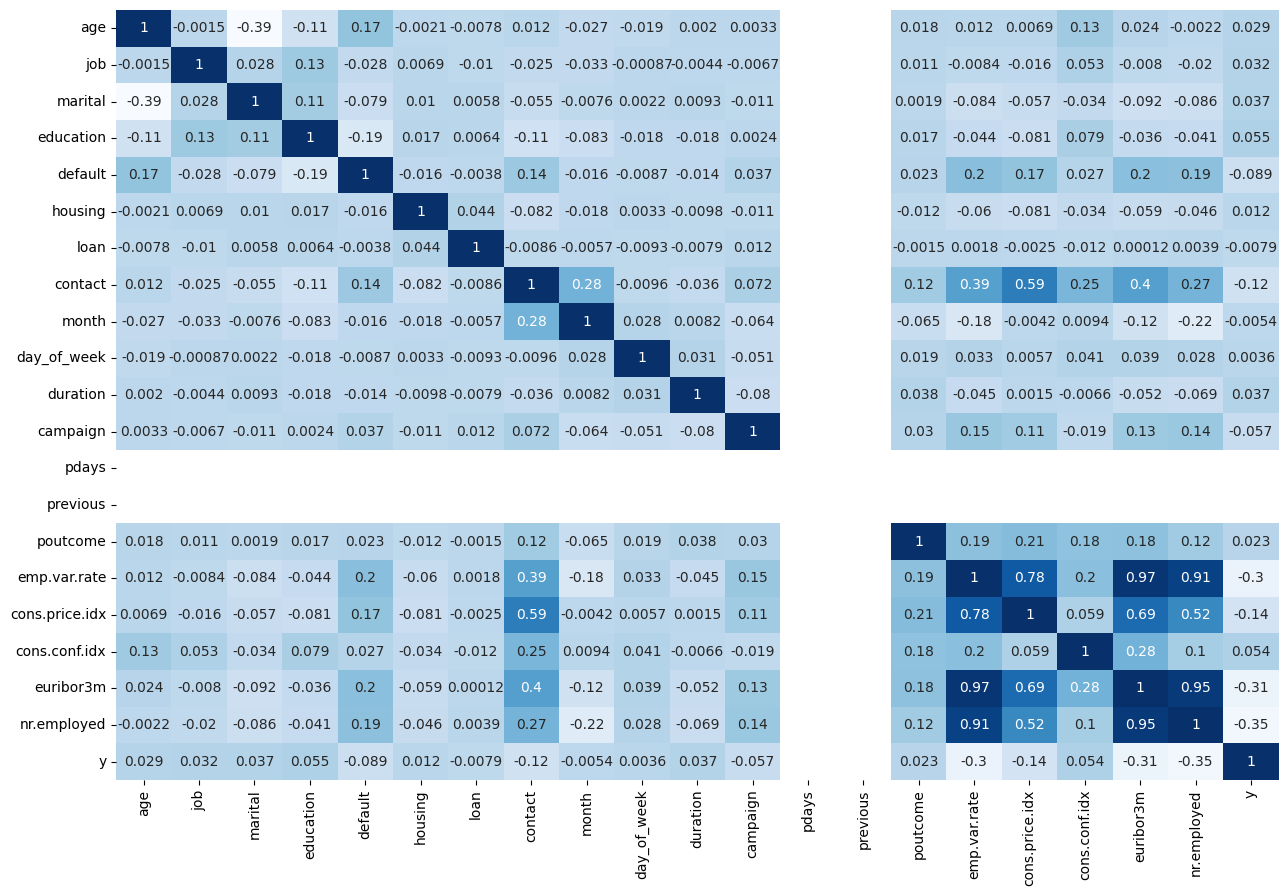

In [ ]:
data2=X.copy()
data2['y']=y.copy()
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(),cbar=False,cmap='Blues',annot=True)
data2.corr()

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

rf_y_pred = rf_classifier.predict(X_test)

In [ ]:
#CLASSIFFICATION REPORT
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7265
           1       0.65      0.49      0.56       971

    accuracy                           0.91      8236
   macro avg       0.79      0.73      0.75      8236
weighted avg       0.90      0.91      0.90      8236



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(y_test,rf_y_pred))

[[7004  261]
 [ 491  480]]


Text(95.72222222222221, 0.5, 'Stvarno')

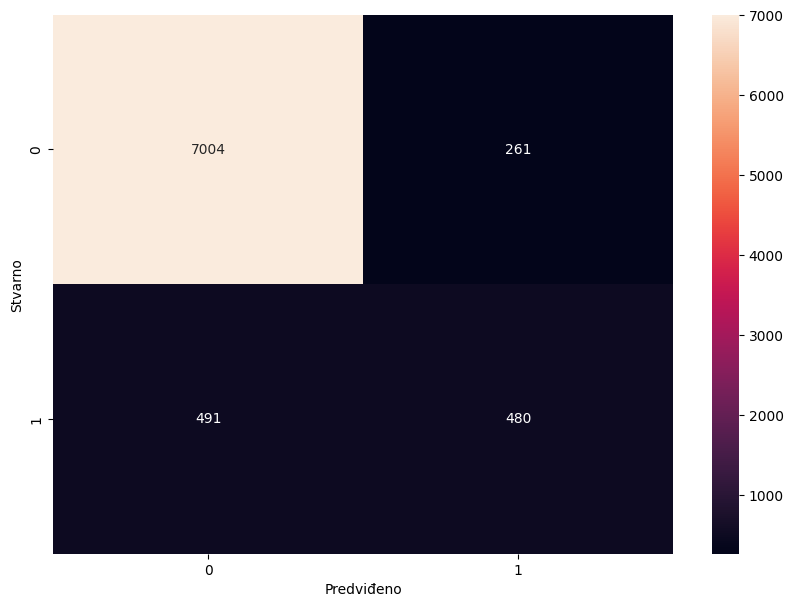

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=rf_y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')